In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import nltk
import string
from nltk.corpus import stopwords

In [2]:
import sklearn
print(sklearn.__version__)


1.2.2


In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [4]:
with open('/content/drive/MyDrive/DataMining/News_Category_Dataset_v3.json','r') as f:
    jdata = f.read()

jdata2  = [json.loads(line) for line in jdata.split('\n') if line]
df = pd.DataFrame.from_records(jdata2)

In [5]:
print(jdata2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
display(df[0:34])

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
8,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
9,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


In [7]:
print(df.shape)


(209527, 6)


In [8]:
# Check for empty strings or empty lists/objects in each column
def check_empty_values(series):
    return (series.apply(lambda x: x == '' or x == [] or x == {})).sum()

empty_values_per_column = df.apply(check_empty_values)

empty_values_per_column

link                     0
headline                 6
category                 0
short_description    19712
authors              37418
date                     0
dtype: int64

In [9]:
import pandas as pd

# Load your dataframe here
# df = pd.read_csv('path_to_your_csv.csv')

# Replace empty descriptions with the headline
df['short_description'] = df.apply(
    lambda row: row['headline'] if pd.isnull(row['short_description']) or row['short_description'] == '' else row['short_description'],
    axis=1
)

# Now df has the 'short_description' column with empty entries replaced by the 'headline' values.


In [10]:
# Check for empty strings or empty lists/objects in each column
def check_empty_values(series):
    return (series.apply(lambda x: x == '' or x == [] or x == {})).sum()

empty_values_per_column = df.apply(check_empty_values)

empty_values_per_column

link                     0
headline                 6
category                 0
short_description        5
authors              37418
date                     0
dtype: int64

In [11]:
import pandas as pd

# Load your dataframe here
# df = pd.read_csv('path_to_your_csv.csv')

# Replace empty strings with NaN
df['short_description'].replace('', pd.NA, inplace=True)

# Drop rows where 'short_description' is NaN
df.dropna(subset=['short_description'], inplace=True)

# Now df no longer contains rows with empty 'short_description' entries.


In [12]:
# Check for empty strings or empty lists/objects in each column
def check_empty_values(series):
    return (series.apply(lambda x: x == '' or x == [] or x == {})).sum()

empty_values_per_column = df.apply(check_empty_values)

empty_values_per_column

link                     0
headline                 1
category                 0
short_description        0
authors              37418
date                     0
dtype: int64

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import json

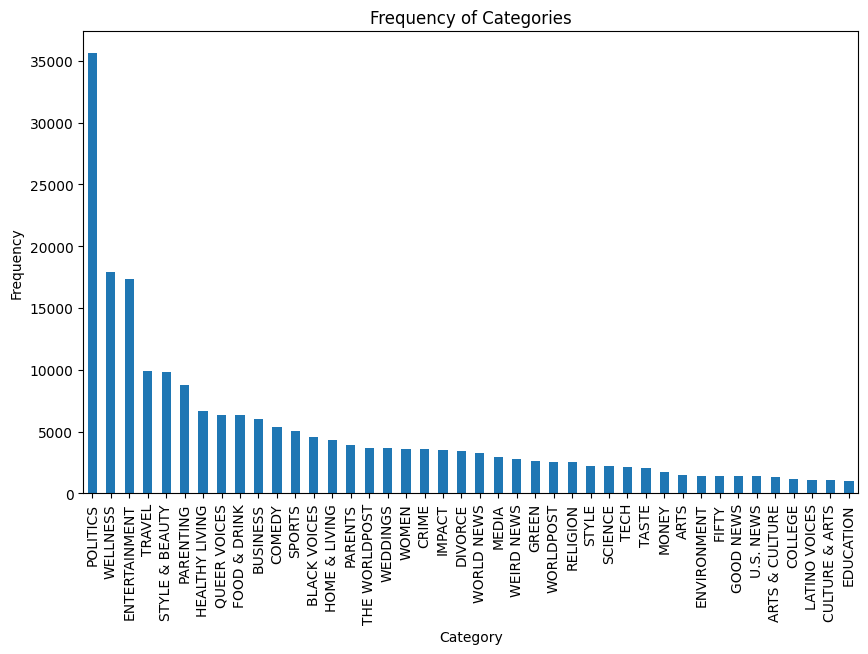

In [14]:
# Data Analysis
# Get the count of each category
category_counts = df['category'].value_counts()

# Data Visualization
# Bar Chart for Category Frequency
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()



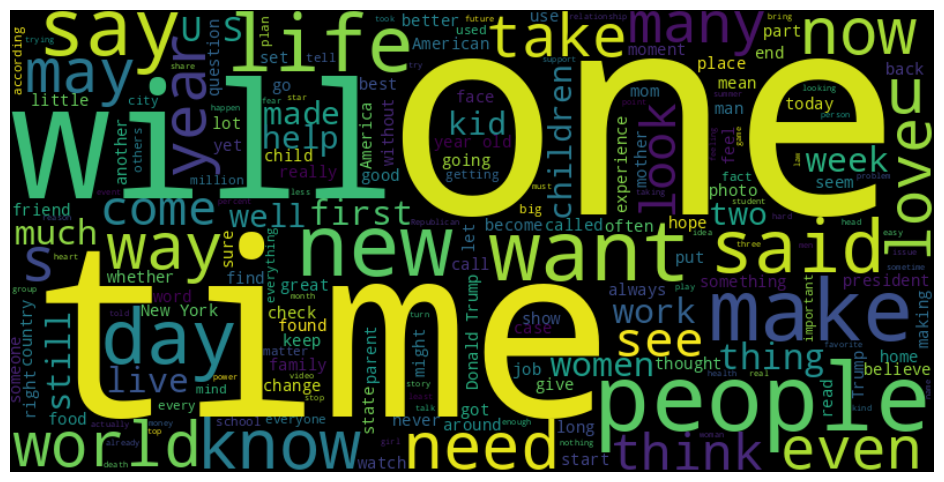

In [ ]:
# Word Cloud for 'short_description'
text = ' '.join(df['short_description'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



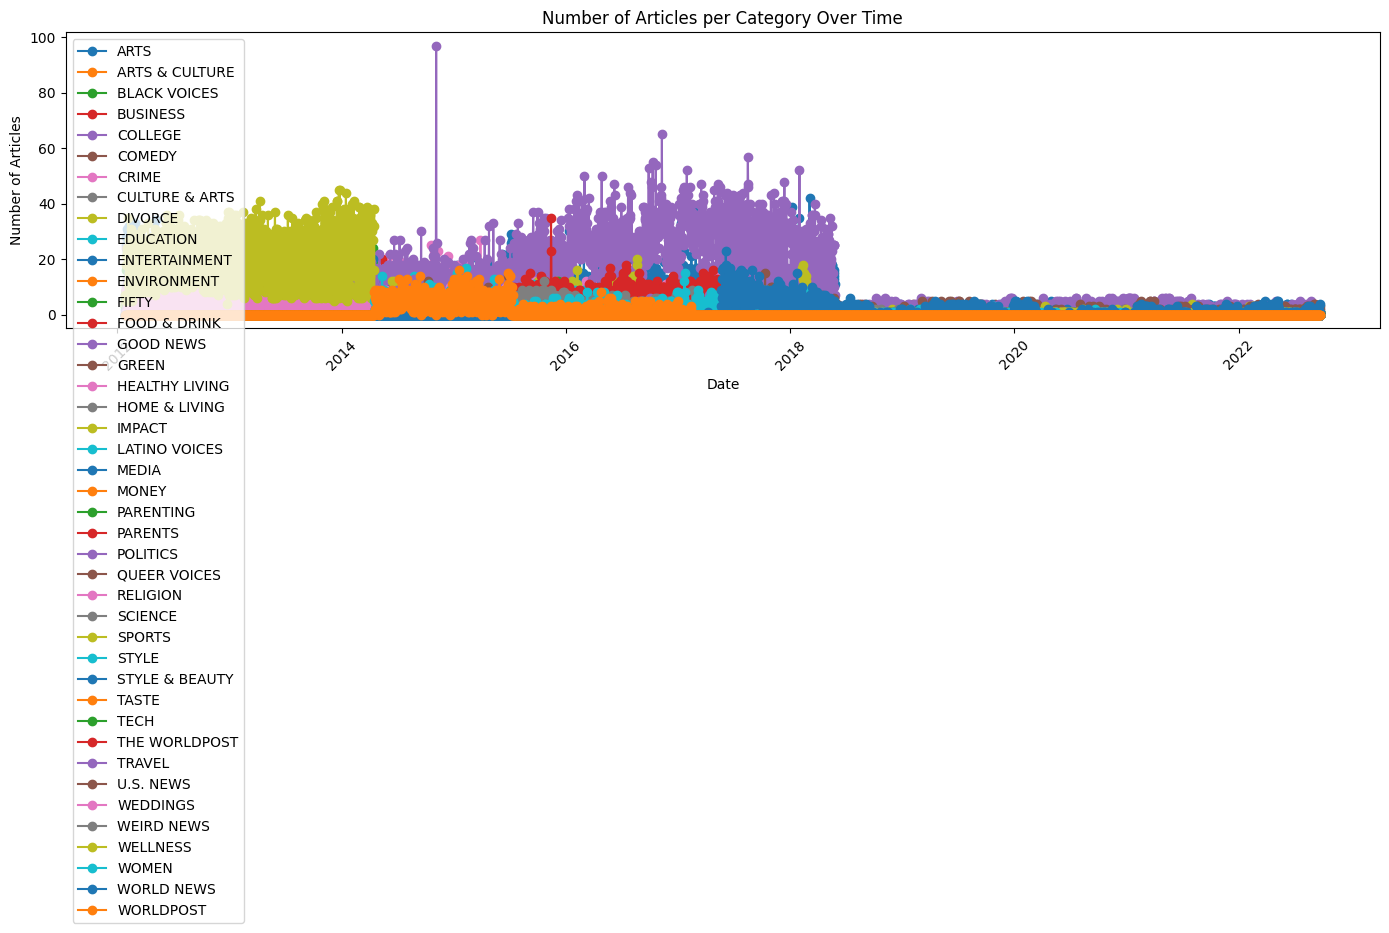

<ipython-input-48-f646e8b338be>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='category', y='counts', data=df_grouped.groupby('category').sum().reset_index())


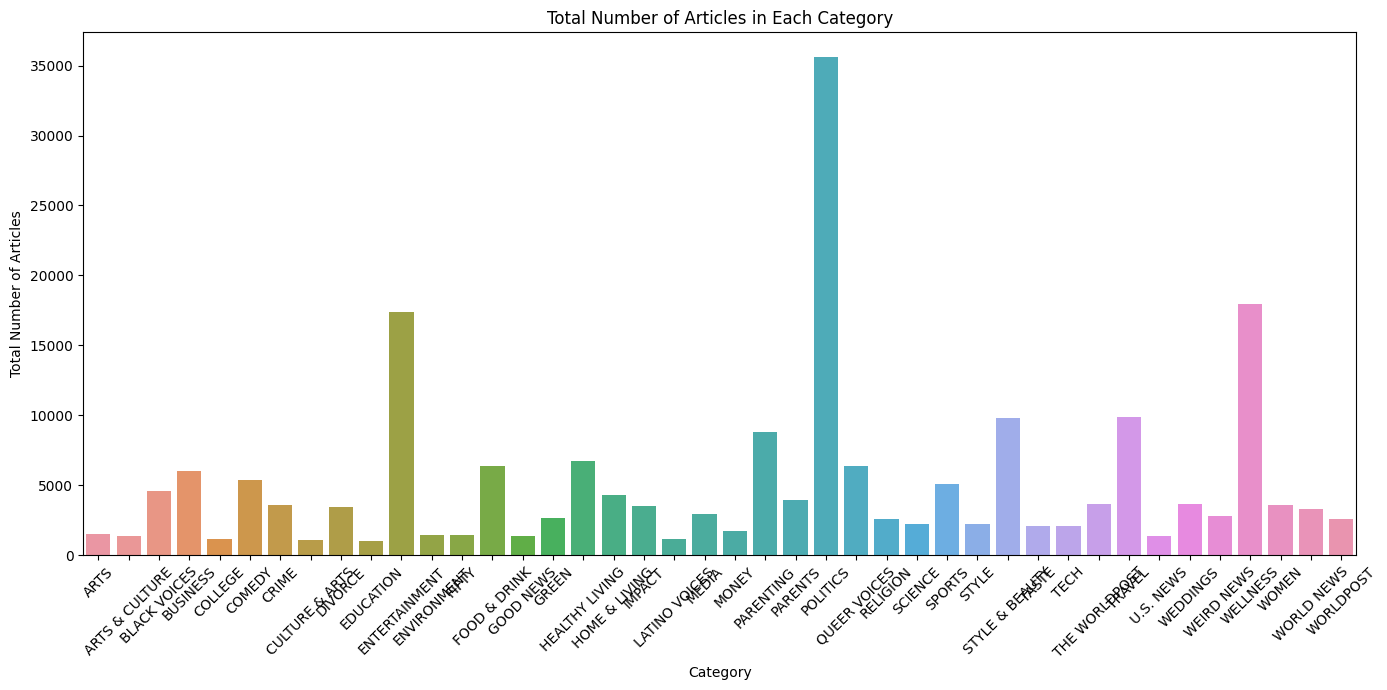

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that your 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by category and date to count the number of articles per day for each category
df_grouped = df.groupby(['category', df['date'].dt.date]).size().reset_index(name='counts')

# Pivot the data for line graph plotting
df_pivot = df_grouped.pivot(index='date', columns='category', values='counts').fillna(0)

# Plotting line graph for the top 8 categories over time
plt.figure(figsize=(14, 7))
plt.plot(df_pivot, marker='o')
plt.title('Number of Articles per Category Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(df_pivot.columns, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for the total number of articles in each category
plt.figure(figsize=(14, 7))
sns.barplot(x='category', y='counts', data=df_grouped.groupby('category').sum().reset_index())
plt.title('Total Number of Articles in Each Category')
plt.xlabel('Category')
plt.ylabel('Total Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [15]:
# Find the top 10 categories
top_categories = df['category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
df_filtered = df[df['category'].isin(top_categories)]

# Drop all other columns except 'category' and 'short_description'
df_final = df_filtered[['category', 'short_description']]

# You can now work with df_final which contains only the data you want

In [ ]:
df_final.sample(5)

,category,short_description
195965,STYLE & BEAUTY,See more celebrity fragrances! Want more? Be s...
202815,PARENTING,Although they were on opposite teams with comp...
175105,ENTERTAINMENT,Live Nation's UK website leaked an image on Fe...
172477,WELLNESS,March is National Women's History Month. To ce...
13369,ENTERTAINMENT,WORLD STOP.


In [ ]:
print(df_final['category'].value_counts())

POLITICS          35601
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6346
FOOD & DRINK       6340
BUSINESS           5991
Name: category, dtype: int64


In [ ]:
import pandas as pd

# Assuming df_final is your dataframe and it has been loaded correctly.

# Shuffle the dataframe
df_final = df_final.sample(frac=1).reset_index(drop=True)

# Filter out the 'POLITICS' category
politics_df = df_final[df_final['category'] == 'POLITICS']
other_categories_df = df_final[df_final['category'] != 'POLITICS']

# Sample 12,000 entries from the 'POLITICS' category
politics_sampled_df = politics_df.sample(n=17500)

# Concatenate the sampled 'POLITICS' with the rest of the categories
df_final = pd.concat([politics_sampled_df, other_categories_df]).sample(frac=1).reset_index(drop=True)


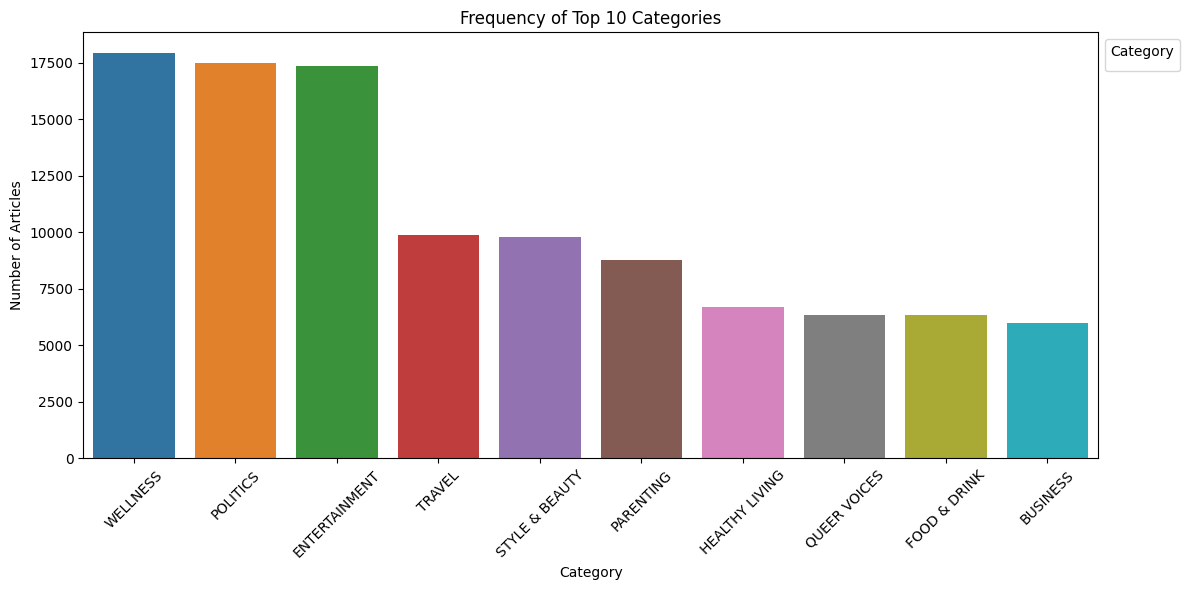

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# final DataFrame after filtering with the top 8 categories

# Count the number of occurrences for each category
category_counts = df_final['category'].value_counts().sort_values(ascending=False)

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a bar plot with 'category' on the x-axis and the counts on the y-axis
sns.barplot(x=category_counts.index, y=category_counts.values)

# Set the title and labels of the plot
plt.title('Frequency of Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Move the legend to the side
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the layout fits well
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
df_final

,category,short_description
0,POLITICS,Historians see in Trump the biggest liar in pr...
1,POLITICS,"In April, Ryan Zinke listened to Charles Johns..."
2,ENTERTAINMENT,"Kevin Devine has, clearly, thought a great dea..."
3,STYLE & BEAUTY,Christian Louboutin is launching a beauty line...
4,ENTERTAINMENT,Jennifer Lawrence is full of surprises — and f...
...,...,...
106678,FOOD & DRINK,Now if only they could make an adult-sized Pla...
106679,WELLNESS,The FDA said its analysis showed that the coun...
106680,TRAVEL,Eccentricity makes New Orleans a natural conte...
106681,PARENTING,I love them all equally. I don't love any one ...


In [ ]:
# Upsampling the data
SEED = 42
df_list = []
#Get news in top 15 categories
for i in top_categories:
    df_list.append(pd.DataFrame(df_final[df_final["category"]==i]))
for i in range(len(df_list)):
    df_list[i] = pd.DataFrame(df_list[i][df_list[i]["short_description"]!=""])
for i in range(len(df_list)):
    df_list[i] = df_list[i].sample(df_list[0].shape[0], replace=True, random_state=SEED)
df_upsample = pd.concat(df_list)
print(df_upsample.shape)

(175000, 2)


In [ ]:
df_upsample

,category,short_description
96478,POLITICS,“Few issues in education are more important th...
5377,POLITICS,Legal experts saw the GOP appeal to the Suprem...
33443,POLITICS,"Trump ""believes that Russia probably was invol..."
73431,POLITICS,But James Comey admits he doesn't know for sur...
69211,POLITICS,A majority of Democrats in the Senate recently...
...,...,...
70259,BUSINESS,The rumor mill keeps on churning.
72554,BUSINESS,"All month long, we'll be here to demystify you..."
105423,BUSINESS,Third-party settlement costs could be eliminat...
96622,BUSINESS,"""If they are found guilty of these killings th..."


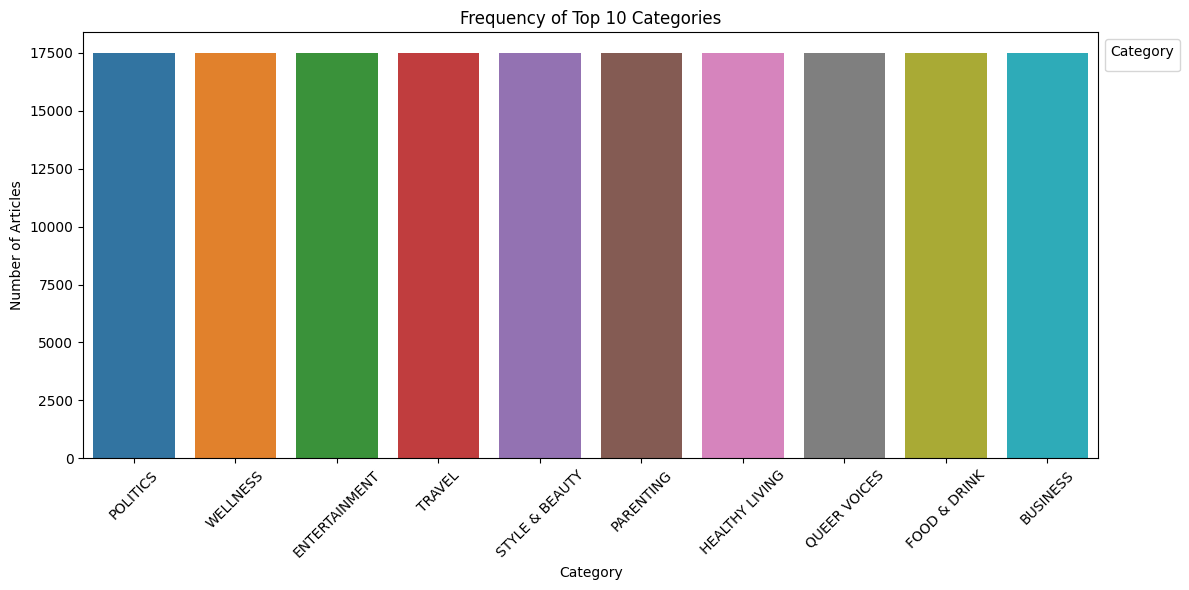

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# final DataFrame after filtering with the top 8 categories

# Count the number of occurrences for each category
category_counts = df_upsample['category'].value_counts().sort_values(ascending=False)

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a bar plot with 'category' on the x-axis and the counts on the y-axis
sns.barplot(x=category_counts.index, y=category_counts.values)

# Set the title and labels of the plot
plt.title('Frequency of Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Move the legend to the side
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the layout fits well
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure you have these NLTK datasets downloaded
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Defining the stemmer
stemmer = SnowballStemmer("english")

# Updated stopwords list
stop_words = set(stopwords.words('english') + ['u', 'im', 'c'])

In [ ]:
# Function to clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

# Function to stem text
def stemm_text(text):
    return ' '.join(stemmer.stem(word) for word in text.split())

In [ ]:
# Function to preprocess data
def preprocess_data(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text = stemm_text(text)
    return text

In [ ]:
# Split the dataset
train, test = train_test_split(df_upsample, test_size=0.2, random_state=42)

# Apply preprocessing to the 'short_description' column
train['clean_text'] = train['short_description'].apply(preprocess_data)
test['clean_text'] = test['short_description'].apply(preprocess_data)

# Now 'train' and 'test' DataFrames have a 'clean_text' column with preprocessed text

In [ ]:
train

,category,short_description,clean_text
34171,FOOD & DRINK,"Whether you like them beer-battered, cornmeal ...",whether like beerbatt cornmeal crust bake
77625,BUSINESS,Although a majority of these concerns peaked b...,although major concern peak gallup recent resu...
25617,BUSINESS,Not having a written business succession plan ...,written busi success plan least under caus bus...
15876,STYLE & BEAUTY,Holy high street! And on a red carpet sagging ...,holi high street red carpet sag weight bore an...
67380,PARENTING,But there's always room for improvement. via A...,there alway room improv via amazon one comment...
...,...,...,...
92586,HEALTHY LIVING,"""They’re in the community, they’re getting the...",they'r communiti they'r get support need they'...
49584,PARENTING,I recently watched my sister perform an act of...,recent watch sister perform act magic sit rest...
76033,QUEER VOICES,Understanding The Hurdles To Gender Confirmati...,understand hurdl gender confirm surgeri
98083,FOOD & DRINK,Sage pasta advice from an Iron Chef. Trust him.,sage pasta advic iron chef trust


In [ ]:
# Assuming 'train' is your existing DataFrame
train_reduced = train[['category','clean_text']]

In [ ]:
train_reduced

,category,clean_text
34171,FOOD & DRINK,whether like beerbatt cornmeal crust bake
77625,BUSINESS,although major concern peak gallup recent resu...
25617,BUSINESS,written busi success plan least under caus bus...
15876,STYLE & BEAUTY,holi high street red carpet sag weight bore an...
67380,PARENTING,there alway room improv via amazon one comment...
...,...,...
92586,HEALTHY LIVING,they'r communiti they'r get support need they'...
49584,PARENTING,recent watch sister perform act magic sit rest...
76033,QUEER VOICES,understand hurdl gender confirm surgeri
98083,FOOD & DRINK,sage pasta advic iron chef trust


In [ ]:


# converting DataFrame to CSV File
#train_reduced.to_csv('train_reduced.csv', index=False)


In [ ]:
test

,category,short_description,clean_text
63553,FOOD & DRINK,"Don't just eat like a king, eat like the king.",dont eat like king eat like king
13002,BUSINESS,"Truthfully, the highest credit score is not th...",truth highest credit score score shoot whole p...
7666,QUEER VOICES,"“Well, maybe just a gorgeous facial hair momen...",“well mayb gorgeous facial hair moment like ― ...
23356,WELLNESS,"There's a place for Lycra. Spin class perhaps,...",there place lycra spin class perhap mayb run p...
76993,POLITICS,"“Everything is off now, and Stormy is going to...",“everyth stormi go tell story” former porn act...
...,...,...,...
94515,HEALTHY LIVING,The research did not include mental health ser...,research includ mental health servic provid sc...
73423,ENTERTAINMENT,"""You brought us so much joy.""",brought us much joy
82871,QUEER VOICES,"Sometime during the past fifteen years, I stop...",sometim past fifteen year stop oblivi instead ...
101576,STYLE & BEAUTY,Lawley has a point. Perhaps if we work to shif...,lawley point perhap work shift focus away bodi...


In [ ]:
test_reduced = test[['category','clean_text']]

In [ ]:
test_reduced

,category,clean_text
63553,FOOD & DRINK,dont eat like king eat like king
13002,BUSINESS,truth highest credit score score shoot whole p...
7666,QUEER VOICES,“well mayb gorgeous facial hair moment like ― ...
23356,WELLNESS,there place lycra spin class perhap mayb run p...
76993,POLITICS,“everyth stormi go tell story” former porn act...
...,...,...
94515,HEALTHY LIVING,research includ mental health servic provid sc...
73423,ENTERTAINMENT,brought us much joy
82871,QUEER VOICES,sometim past fifteen year stop oblivi instead ...
101576,STYLE & BEAUTY,lawley point perhap work shift focus away bodi...


In [ ]:
#test_reduced.to_csv('test_reduced.csv', index=False)

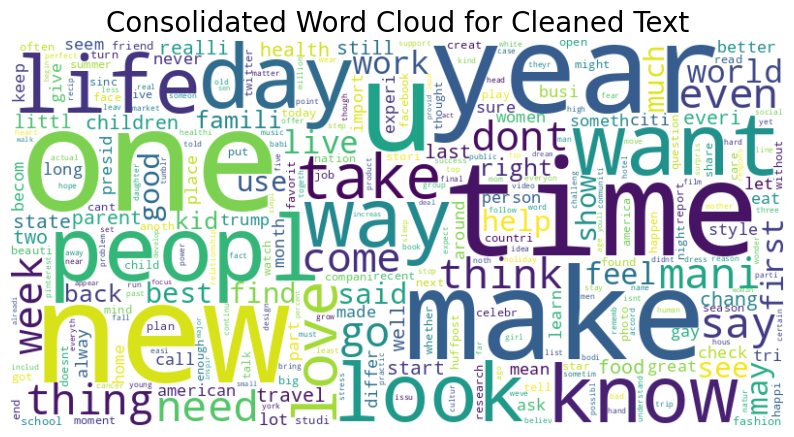

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to combine all text of the 'clean_text' column into one large string
def aggregate_text(dataframe, column_name):
    # Join all the items in the column into a single string separated by spaces
    combined_text = ' '.join(dataframe[column_name])
    return combined_text

# Function to generate and display a word cloud
def display_word_cloud(combined_text, title):
    # Create a WordCloud object with custom configurations
    wordcloud = WordCloud(
        background_color='white',
        max_words=300,
        contour_width=3,
        contour_color='steelblue',
        width=800,
        height=400,
        max_font_size=150,
        collocations=False
    ).generate(combined_text)  # Generate the word cloud from the combined text

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')  # Hide the axes
    plt.show()

# Assuming 'train_reduced' DataFrame has a 'clean_text' column
# Aggregate the text from the 'clean_text' column
combined_text = aggregate_text(train_reduced, 'clean_text')

# Generate and display the word cloud with a custom title
display_word_cloud(combined_text, 'Consolidated Word Cloud for Cleaned Text')


In [ ]:
import joblib

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to transform data using TF-IDF
def transform_data_tfidf(train_data, test_data, text_column, target_column):
    # Initialize the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1,2))

    # Fit and transform the training data
    X_train_transformed = tfidf_vectorizer.fit_transform(train_data[text_column])
    y_train = train_data[target_column]

    # Transform the test data
    X_test_transformed = tfidf_vectorizer.transform(test_data[text_column])
    y_test = test_data[target_column]

    joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

    return X_train_transformed, y_train, X_test_transformed, y_test

# Applying the transformation to your dataset
X_train_tfidf, y_train, X_test_tfidf, y_test = transform_data_tfidf(train_reduced, test_reduced, 'clean_text', 'category')


MODELS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Function to train and evaluate logistic regression model
def train_evaluate_logistic_regression(X_train, y_train, X_test, y_test):
    # Initialize the logistic regression model
    logistic_model = LogisticRegression(random_state=42, max_iter=1000)

    # Train the model
    logistic_model.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = logistic_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")

    return logistic_model

# Train and evaluate the logistic regression model
model_log = train_evaluate_logistic_regression(X_train_tfidf, y_train, X_test_tfidf, y_test)


Accuracy: 0.8063142857142858
Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.83      0.84      0.84      3457
 ENTERTAINMENT       0.74      0.72      0.73      3546
  FOOD & DRINK       0.85      0.90      0.87      3495
HEALTHY LIVING       0.81      0.73      0.77      3545
     PARENTING       0.79      0.82      0.80      3417
      POLITICS       0.79      0.78      0.79      3445
  QUEER VOICES       0.89      0.80      0.84      3539
STYLE & BEAUTY       0.86      0.85      0.85      3539
        TRAVEL       0.84      0.84      0.84      3532
      WELLNESS       0.69      0.78      0.73      3485

      accuracy                           0.81     35000
     macro avg       0.81      0.81      0.81     35000
  weighted avg       0.81      0.81      0.81     35000



Accuracy: 0.8063142857142858


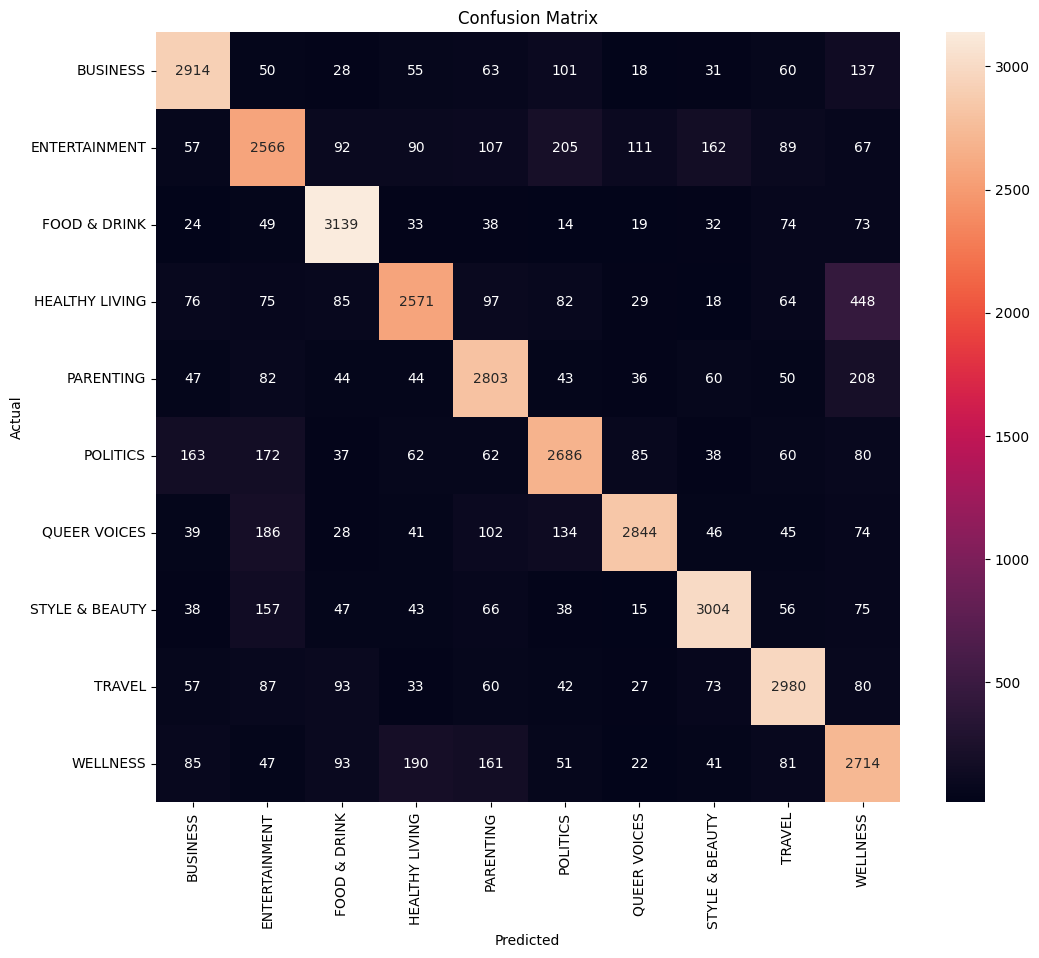

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels for the test set
y_pred = model_log.predict(X_test_tfidf)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# After training the logistic regression model:
joblib.dump(model_log, 'joblib_logistic_regression.joblib')


['joblib_logistic_regression.joblib']

Random Forest Model Accuracy: 0.8984857142857143
                precision    recall  f1-score   support

      BUSINESS       0.94      0.95      0.95      3457
 ENTERTAINMENT       0.75      0.86      0.80      3546
  FOOD & DRINK       0.92      0.96      0.94      3495
HEALTHY LIVING       0.89      0.90      0.90      3545
     PARENTING       0.95      0.91      0.93      3417
      POLITICS       0.86      0.86      0.86      3445
  QUEER VOICES       0.94      0.93      0.94      3539
STYLE & BEAUTY       0.94      0.90      0.92      3539
        TRAVEL       0.94      0.90      0.92      3532
      WELLNESS       0.88      0.80      0.84      3485

      accuracy                           0.90     35000
     macro avg       0.90      0.90      0.90     35000
  weighted avg       0.90      0.90      0.90     35000



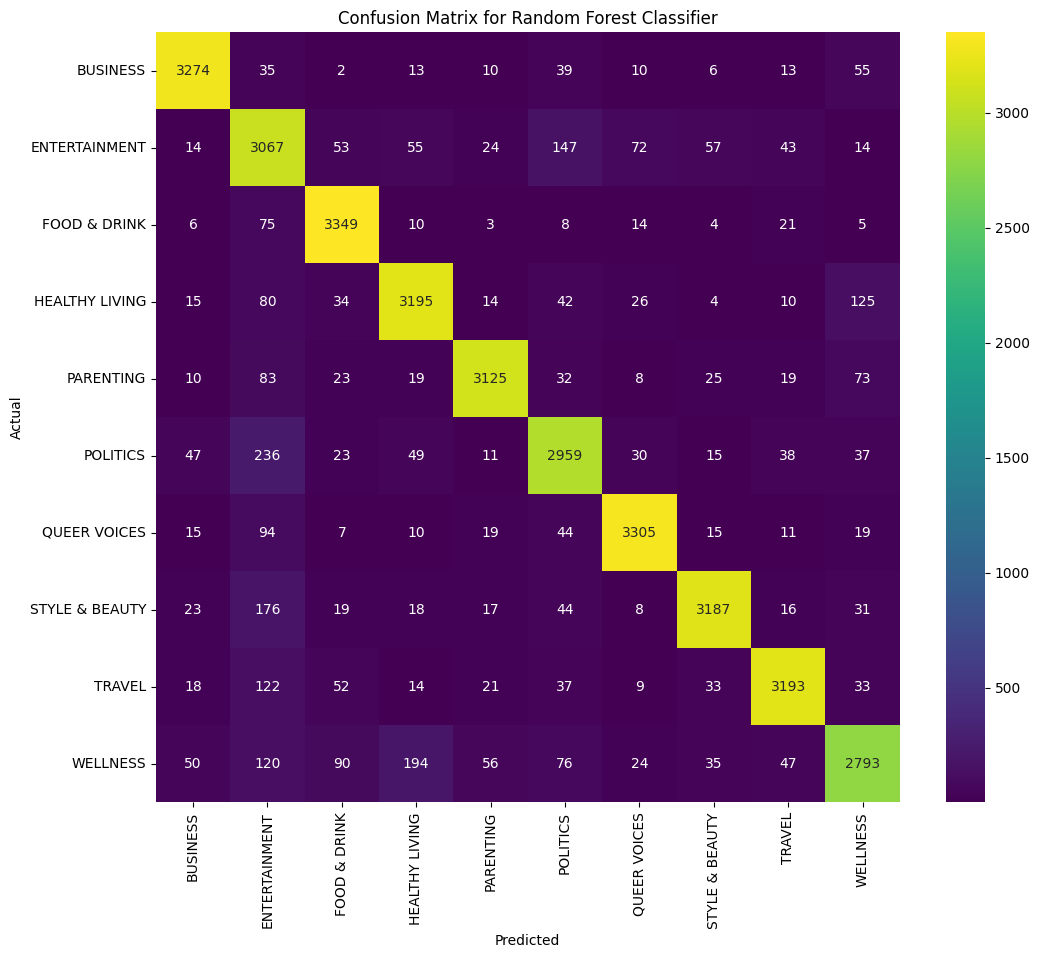

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the training data
rf_model.fit(X_train_tfidf, y_train)

# Predict the categories on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf}")

# Display the classification report
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='viridis', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


Random Forest Model Accuracy: 0.8984857142857143
                precision    recall  f1-score   support

      BUSINESS       0.94      0.95      0.95      3457
 ENTERTAINMENT       0.75      0.86      0.80      3546
  FOOD & DRINK       0.92      0.96      0.94      3495
HEALTHY LIVING       0.89      0.90      0.90      3545
     PARENTING       0.95      0.91      0.93      3417
      POLITICS       0.86      0.86      0.86      3445
  QUEER VOICES       0.94      0.93      0.94      3539
STYLE & BEAUTY       0.94      0.90      0.92      3539
        TRAVEL       0.94      0.90      0.92      3532
      WELLNESS       0.88      0.80      0.84      3485

      accuracy                           0.90     35000
     macro avg       0.90      0.90      0.90     35000
  weighted avg       0.90      0.90      0.90     35000



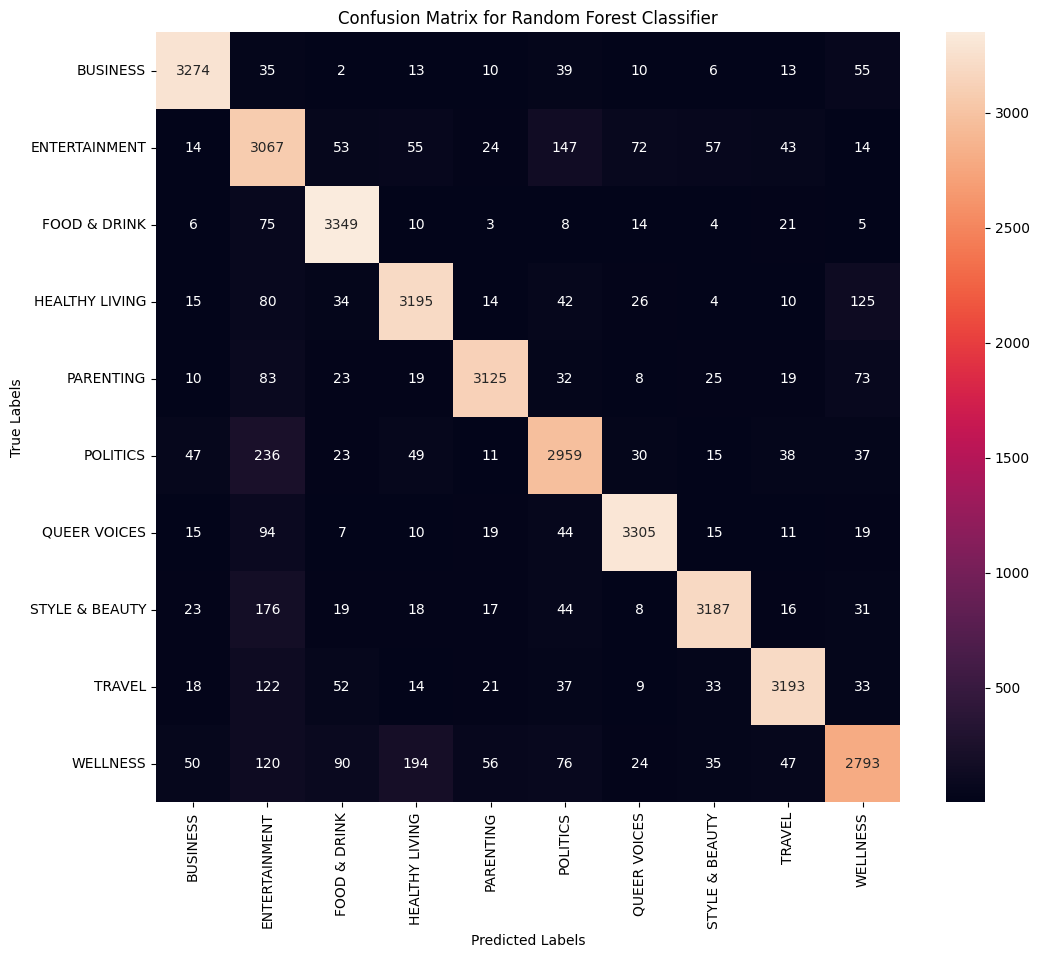

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels for the test set using the Random Forest model
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf}")

# Display the classification report
print(classification_report(y_test, y_pred_rf))

# Create the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


In [ ]:
import joblib

# After training the logistic regression model:
joblib.dump(rf_model, 'joblib_rf.joblib')

['joblib_rf.joblib']

SVC Model Accuracy: 0.8544
                precision    recall  f1-score   support

      BUSINESS       0.89      0.89      0.89      3457
 ENTERTAINMENT       0.75      0.80      0.77      3546
  FOOD & DRINK       0.90      0.92      0.91      3495
HEALTHY LIVING       0.87      0.79      0.83      3545
     PARENTING       0.86      0.87      0.86      3417
      POLITICS       0.83      0.82      0.83      3445
  QUEER VOICES       0.93      0.85      0.89      3539
STYLE & BEAUTY       0.90      0.89      0.90      3539
        TRAVEL       0.90      0.88      0.89      3532
      WELLNESS       0.75      0.83      0.79      3485

      accuracy                           0.85     35000
     macro avg       0.86      0.85      0.86     35000
  weighted avg       0.86      0.85      0.86     35000



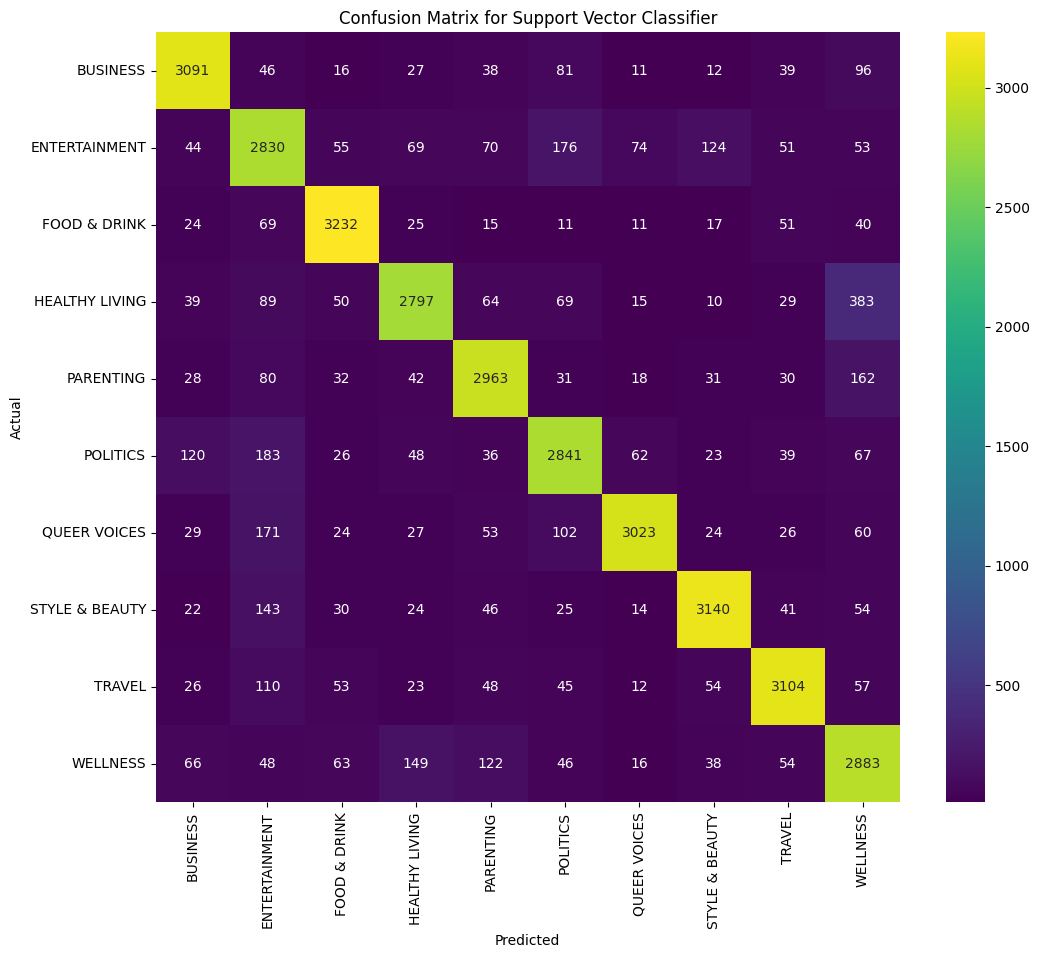

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svc_model.fit(X_train_tfidf, y_train)

# Predict the categories on the test data
y_pred_svc = svc_model.predict(X_test_tfidf)

# Calculate the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Model Accuracy: {accuracy_svc}")

# Display the classification report
print(classification_report(y_test, y_pred_svc))

# Generate the confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_svc, annot=True, fmt='g', cmap='viridis', xticklabels=svc_model.classes_, yticklabels=svc_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()


In [ ]:
import joblib

# After training the logistic regression model:
joblib.dump(svc_model, 'joblib_svc.joblib')

['joblib_xgboost.joblib']

In [ ]:
# Create a dictionary to store the models
models = {
    'logistic_regression': model_log,
    'random_forest': rf_model,
    'SVC': svc_model
}

# Save all models in a single joblib file
joblib.dump(models, 'models.joblib')

['models.joblib']